Epoch 1/20
4941/4941 [==============================] - 9s 2ms/step - loss: 2.3036 - mean_absolute_error: 2.3036 - mean_absolute_percentage_error: 958087.2510
Epoch 2/20
4941/4941 [==============================] - 6s 1ms/step - loss: 1.2791 - mean_absolute_error: 1.2791 - mean_absolute_percentage_error: 1347564.1791
Epoch 3/20
4941/4941 [==============================] - 6s 1ms/step - loss: 1.2430 - mean_absolute_error: 1.2430 - mean_absolute_percentage_error: 1390990.4055
Epoch 4/20
4941/4941 [==============================] - 6s 1ms/step - loss: 1.2474 - mean_absolute_error: 1.2474 - mean_absolute_percentage_error: 1567744.6239
Epoch 5/20
4941/4941 [==============================] - 6s 1ms/step - loss: 1.2387 - mean_absolute_error: 1.2387 - mean_absolute_percentage_error: 1523228.4351
Epoch 6/20
4941/4941 [==============================] - 5s 1ms/step - loss: 1.2190 - mean_absolute_error: 1.2190 - mean_absolute_percentage_error: 1595154.4771
Epoch 7/20
4941/4941 [===================

4942/4942 [==============================] - 9s 2ms/step - loss: 2.2950 - mean_absolute_error: 2.2950 - mean_absolute_percentage_error: 1180833.8528
Epoch 2/20
4942/4942 [==============================] - 6s 1ms/step - loss: 1.2651 - mean_absolute_error: 1.2651 - mean_absolute_percentage_error: 1199761.5137
Epoch 3/20
4942/4942 [==============================] - 5s 1ms/step - loss: 1.2440 - mean_absolute_error: 1.2440 - mean_absolute_percentage_error: 1585958.9568
Epoch 4/20
4942/4942 [==============================] - 5s 1ms/step - loss: 1.2233 - mean_absolute_error: 1.2233 - mean_absolute_percentage_error: 1395958.6660
Epoch 5/20
4942/4942 [==============================] - 5s 1ms/step - loss: 1.2262 - mean_absolute_error: 1.2262 - mean_absolute_percentage_error: 1445176.6910
Epoch 6/20
4942/4942 [==============================] - 5s 1ms/step - loss: 1.2184 - mean_absolute_error: 1.2184 - mean_absolute_percentage_error: 1808534.9972
Epoch 7/20
4942/4942 [=============================

5491/5491 [==============================] - 12s 2ms/step - loss: 2.0268 - mean_absolute_error: 2.0268 - mean_absolute_percentage_error: 1694940.3899
Epoch 2/20
5491/5491 [==============================] - 7s 1ms/step - loss: 1.2636 - mean_absolute_error: 1.2636 - mean_absolute_percentage_error: 1230780.6051
Epoch 3/20
5491/5491 [==============================] - 6s 1ms/step - loss: 1.2201 - mean_absolute_error: 1.2201 - mean_absolute_percentage_error: 1354985.1789
Epoch 4/20
5491/5491 [==============================] - 9s 2ms/step - loss: 1.2233 - mean_absolute_error: 1.2233 - mean_absolute_percentage_error: 1405028.6958
Epoch 5/20
5491/5491 [==============================] - 6s 1ms/step - loss: 1.2640 - mean_absolute_error: 1.2640 - mean_absolute_percentage_error: 1427181.9791
Epoch 6/20
5491/5491 [==============================] - 6s 1ms/step - loss: 1.2077 - mean_absolute_error: 1.2077 - mean_absolute_percentage_error: 1502775.1066
Epoch 7/20
5491/5491 [============================

1/1 [==============================] - 0s 5ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 5ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 5ms/step


1/1 [==============================] - 0s 5ms/step


1/1 [==============================] - 0s 4ms/step


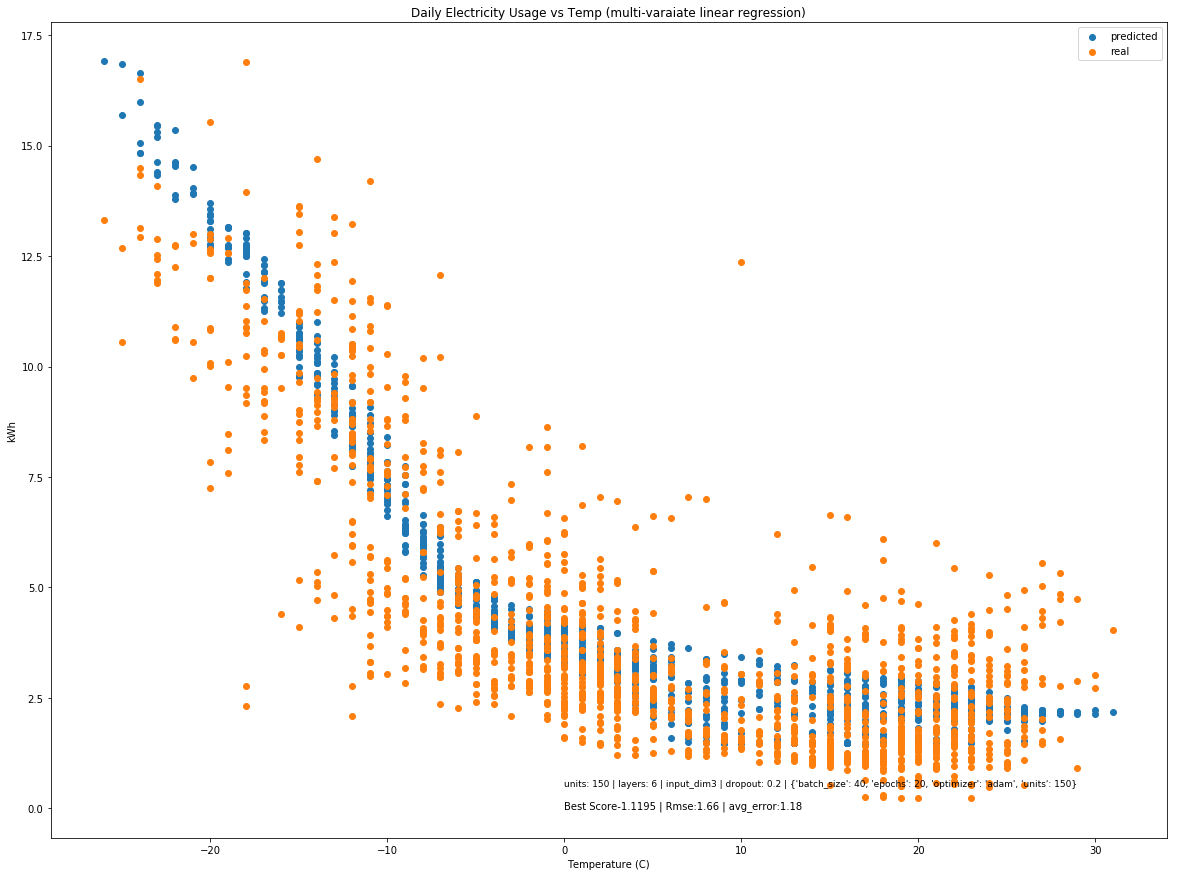

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('data/hourly/myfile.csv')
data = data.drop(['Date and time','Month','Weekday'],axis=1)

sc = MinMaxScaler(feature_range = (0,1))  #StandardScaler for standatization and MinMaxScaler forn normalization 
#sc = StandardScaler()
#data = sc.fit_transform(data)

X = data.iloc[:, 1:4].values
y = data.iloc[:, 0].values
# dayEncoder = LabelEncoder()
# X[:, 1] = dayEncoder.fit_transform(X[:, 1])
# monthEncoder = LabelEncoder()
# X[:, 2] = monthEncoder.fit_transform(X[:, 2])

# onehotencoder = OneHotEncoder(categorical_features = 'all')

# day = X[:,1].reshape(-1,1) 
# day = onehotencoder.fit_transform(day).toarray()
# #remove first dummy variable to avoid trap
# day = day[:,1:]

# month = X[:,2].reshape(-1,1)
# month = onehotencoder.fit_transform(month).toarray()
# #remove first dummy variable to avoid trap
# month = month[:,1:]

# temp=X[:,0].reshape(-1,1)

# X = np.concatenate((day, month), axis=1)
# X = np.concatenate((X, temp), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

neurons = [150]
dimensions = np.shape(X)[1]
layers = 6
dropout = 0.2
def baseline_model(optimizer,units):
# Initialising the ANN
    model = Sequential()
     # Adding the input layer 
    model.add(Dense(units=units, kernel_initializer='uniform', activation='relu', input_dim=dimensions))
    for i in range(0, layers):
        #add hidden layers
        model.add(Dense(units=units, kernel_initializer='uniform', activation='relu'))
        model.add(Dropout(dropout))
    #model.add(Dropout(0.2))
    # Adding the output layer
    model.add(Dense(units=1, kernel_initializer='uniform', activation='relu'))
    
    # Compiling the ANN
    model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mae', 'mape'])
    return model

# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, verbose=1)

#hyperparameters tuning
parameters = {#'batch_size': [100,200,400],
              'batch_size': [40],
              'epochs': [20],
              'optimizer': ['adam'],
              'units': neurons,
              }

grid_search = GridSearchCV(estimator = estimator,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 10)


grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(best_parameters)
print(best_accuracy)


real_energy_usage = []
temp = []
error = []
predicted = []

plt.rcParams['figure.figsize'] = (20, 15)
for i,day in enumerate(y_test):
    prediction = grid_search.predict((np.array([X_test[i]])))
    predicted.append(np.asscalar(prediction))
    # test.append(y_test[i])
    
    # temp.append(X_test[i][0])
    error.append(abs(y_test[i] - prediction))



real_energy_usage = y_test[:]
#real_energy_usage = test
#real_energy_usage = np.expand_dims(np.asarray(real_energy_usage),axis=1)       
#real_energy_usage_tbl = np.zeros(shape=(len(real_energy_usage), 1 + 2 ))
#real_energy_usage_tbl[:,0] = real_energy_usage[:,0]
#real_energy_usage  = sc.inverse_transform(real_energy_usage_tbl)[:,0]

temp = X_test[:,0]
temp = np.expand_dims(np.asarray(temp),axis=1)       
temp_tbl = np.zeros(shape=(len(temp), 1 + 2 ))
temp_tbl[:,0] = temp[:,0]
temp = sc.inverse_transform(temp_tbl)[:,0]


rmse = sqrt(mean_squared_error(real_energy_usage ,predicted))
avg_error =  sum(error) / float(len(error))

plt.title('Daily Electricity Usage vs Temp (multi-varaiate linear regression)')
plt.text(0,0,"Best Score" + str(round(best_accuracy,4)) + " | " 
         + "Rmse:" + str(round(rmse, 2)) +  " | "
         + "avg_error:" + str(round(avg_error, 2)) , fontsize=10)
plt.text(0,0.5,"units: " + str(neurons[0]) + " | " +  "layers: " + str(layers) +
         " | " + "input_dim" + str(dimensions) + " | "
         + "dropout: " + str(dropout) + " | " + str(best_parameters),fontsize=9)
plt.scatter(temp,predicted)
plt.scatter(temp,real_energy_usage)
plt.xlabel('Temperature (C)')
plt.ylabel('kWh')
plt.legend(['predicted', 'real'], loc='upper right')


#grid_search.best_estimator_.model.save('dnn_100.h5')
plt.show()

